# Segunda Avaliação Parcial

Neste módulo trabalhamos a visualização de dados, assim como as técnicas para acessar estes dados da internet. As técnicas de web scraping que estudamos, usando __Requests__, __Beautiful Soup__ e __Selenium__, permitem implementar aplicações que processam informação diretamente da rede.  

Desde a Instrução prática 7, por exemplo, estamos trabalhando com dados que baixamos do [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos).  

Aprendemos também como implementar uma aplicação com GUI utilizando o __TK Inter__. 

Neste contexto vamos implementar uma aplicação que, a traves de uma GUI, permita gerar gráficos de precipitações e temperaturas medias mensais de um determinado ano, para uma estação meteorológica. A atividade deve ser organizada da seguinte forma.

## Exercício 1

__Primeiro protótipo__: Desenvolva uma interface gráfica que pegue, em tempo real, as informações sobre os dados de quais anos estão disponíveis no site do [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos). Os anos disponíveis devem ser apresentados utilizando um widget apropriado que permita selecionar um, e apenas um ano. Se não tiver conexão a Internet ou se o site não estiver disponível o aplicativo deve mostrar uma mensagem de erro na interface.


### Requisição e manipulação dos dados da web
Foi criada a classe manipulação de dados
Para realizar a requisição dos dados foi utilizado a pacote __requests__  e __BeautifulSoup__ para que fosse possivel agrupar o anos disponiveis e os links para o donwload dos arquivos referentes ao ano




In [1]:
import requests
from bs4 import BeautifulSoup

class ManipulacaoDeDados():
    def __init__(self):
        self._anosLinks = []

        
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        try:
            resposta = requests.get("https://portal.inmet.gov.br/dadoshistoricos", headers=headers)

        

            html = BeautifulSoup(resposta.text, 'html.parser')
        
            articlesTag = html.find_all('article')


            for article in articlesTag:
                link = article.find('a')["href"]
                
                ano = article.find('a').string.split(" ")[1]
                self._anosLinks.append({"ano":ano,"link":link})
        except:
            pass
    

Exemplo da implementação

In [2]:
dados = ManipulacaoDeDados()
for i in dados._anosLinks:
    print(f"{i['ano']}, {i['link']}")

2000, https://portal.inmet.gov.br/uploads/dadoshistoricos/2000.zip
2001, https://portal.inmet.gov.br/uploads/dadoshistoricos/2001.zip
2002, https://portal.inmet.gov.br/uploads/dadoshistoricos/2002.zip
2003, https://portal.inmet.gov.br/uploads/dadoshistoricos/2003.zip
2004, https://portal.inmet.gov.br/uploads/dadoshistoricos/2004.zip
2005, https://portal.inmet.gov.br/uploads/dadoshistoricos/2005.zip
2006, https://portal.inmet.gov.br/uploads/dadoshistoricos/2006.zip
2007, https://portal.inmet.gov.br/uploads/dadoshistoricos/2007.zip
2008, https://portal.inmet.gov.br/uploads/dadoshistoricos/2008.zip
2009, https://portal.inmet.gov.br/uploads/dadoshistoricos/2009.zip
2010, https://portal.inmet.gov.br/uploads/dadoshistoricos/2010.zip
2011, https://portal.inmet.gov.br/uploads/dadoshistoricos/2011.zip
2012, https://portal.inmet.gov.br/uploads/dadoshistoricos/2012.zip
2013, https://portal.inmet.gov.br/uploads/dadoshistoricos/2013.zip
2014, https://portal.inmet.gov.br/uploads/dadoshistoricos/2014

Execução do protopito 01

In [ ]:
#%run -m climaplotEx1 ;

## Exercício 2

__Segundo protótipo__: Com base no ano escolhido sua aplicação deve baixar o arquivo compactado, com os dados de todas as estações, descompactar ele numa pasta temporária e mostrar em um outro widget a lista de estações disponíveis para selecionar uma e apenas uma delas. O widget do protótipo anterior deve ficar disponível para que o usuário possa trocar o ano se desejar. Nesse caso um novo arquivo será baixado e descompactado e as estações disponíveis exibidas para seleção.

### Donwload e descompactação dos arquivos .zip
Para realizar o donwload a classe ManipulacaoDeDados foi expandida. 
Ganhando um novo atributo __path__ referente ao caminho de download.
O pacote __os__ para verificar se o arquivo ja foi baixado anteriormente e para criar a pasta que receberá os donwloads caso a mesma não tenha sido criada antes. 
O pacote __wget__ é utilizado para realizar o donwload do arquivo csv recebendo o link do donwload como parametro. 
O pacote __zipfile__ é reponsavel por descompactar o arquivo zip em uma subpasta com o nome do ano.
A função __getEstacoes__ rebece um ano como parametro e busca todos os arquivos contidos na pasta com o nome do ano e retorna uma lista de dicionarios com o nome e caminho de cada estação



In [3]:
import requests
from bs4 import BeautifulSoup
import wget
import zipfile
import os

class ManipulacaoDeDados():
    def __init__(self):
        self._anosLinks = []
        self._path="./climaplotDonwloads/"

        if not os.path.exists(self._path):
            os.makedirs(self._path)
        
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        try:
            resposta = requests.get("https://portal.inmet.gov.br/dadoshistoricos", headers=headers)

        

            html = BeautifulSoup(resposta.text, 'html.parser')
        
            articlesTag = html.find_all('article')


            for article in articlesTag:
                link = article.find('a')["href"]
                
                ano = article.find('a').string.split(" ")[1]
                self._anosLinks.append({"ano":ano,"link":link})
        except:
            pass

    

    def getDados(self):
        return self._anosLinks

    def getPath(self):
        return self._path
        

    def donwloadCSV(dado,path):

        ano = dado["ano"]
        link = dado["link"]

        pathArquivo = os.path.join(path, ano + ".zip")

        
        if  not ano+".zip" in os.listdir(path):
            wget.download(link,pathArquivo)
            with zipfile.ZipFile(pathArquivo,"r") as zip:
                if  zip.namelist()[0].split("/")[0] == ano:
                    zip.extractall(path)
                else:
                    zip.extractall(path+"/"+ano+"/")
    

    def getEstacoes(ano,path):
        estacoes = []
        try:
            files = os.listdir(path+ano+"/")
            for file in files:
                estacoes.append({
                    "estação":file.split("_")[4],
                    "path": os.path.join(path,ano, file)})
        except Exception:
            print(f"Não há dados de estações baixadas para o ano {ano}")

        return estacoes
    

Exemplo da implementação


In [ ]:
dados = ManipulacaoDeDados()
i = int(input(f"Digite um valor entre {0} e {len(dados._anosLinks)-1} para selecionar o ano"))
ManipulacaoDeDados.donwloadCSV(dados._anosLinks[i], dados._path)
estacoes = ManipulacaoDeDados.getEstacoes(dados._anosLinks[i]['ano'],dados._path)
for j,k in enumerate(estacoes):
    print(f"{j}: \testação: {k['estação']},    csv path: {k['path']}")

Execução do protopito 02

In [ ]:
#%run -m climaplotEx2 ;

# Exercício 3

__Terceiro protótipo__: Com base na estação selecionada gere e exiba dentro da aplicação os gráficos de precipitações e temperaturas medias mensais para a estação selecionada. A interface deve permitir que o usuário troque a estação selecionada a qualquer momento, assim como foi feito co o ano, gerando novos gráficos.   

### Geração de graficos
Para a geração de graficos foi criada uma nova classe __AnaliseDeDados__ que em seu construtor recepe como parametro o caminho para o arquivo csv
O mesmo tambem é responsavel por criar uma Pandas.DataFrame com caminho do csv e fazer o primeiro tratamento, garantindo que o DataFrame seja padronizado observando as principais discrepancias entre os CSVs.
A classe tambem conta com um metodo filtraDados que filtra os dados que foram preenchidos com valor muito grande
Tambem conta com o metodo __geraGraficos__ que gera os graficos de temperatura e precipitação media mensal e retorna o GCF que serve como parametro para a integração com a interface
Para tornar o processo mais comodo e evitar que a interface tenha uma  instancia da classe __AnaliseDeDados__ como parametro fui desenvolvida a função __plotGraficos__ que internamente cria uma instancia da clase __AnaliseDeDados__, filtra os dados, gera o grafico e retorna o GCF

In [ ]:
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt

class AnaliseDeDados():
    """
        Classe responsavel por abrir o arquivo csv, transforma-lo em um Pandas.DataFrame, filtrar os dados e gerar os graficos
    """
    def __init__(self,csv):
        """
            Construtor da classe recebe o caminho para o arquivo csv como parametro
        """
        self._df = pd.read_csv(csv, encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
        self._df.rename({"DATA (YYYY-MM-DD)":"Data","HORA (UTC)":"Hora","Hora UTC":"Hora"},axis=1,inplace=True)
        self._df.index = pd.DatetimeIndex(self._df["Data"]+" "+self._df["Hora"], name="DATA")


        
    def filtraDados(self):
        """
            Metodo resposavel por filtrar dados preenchidos de modo a represebtar dados faltando
        """
        self._df.loc[self._df["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].abs() > 1000, "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] = nan
        self._df.loc[self._df["TEMPERATURA DO PONTO DE ORVALHO (°C)"].abs() > 1000, "TEMPERATURA DO PONTO DE ORVALHO (°C)"] = nan
    

    def geraGraficos(self):
        """
            Metodo responsavel por gerar os graficos de temperatura media mensal do ponto de orvalho e de precipitação media mensal 
        """
        plt.clf()
        plt.subplot(2,1,1)
        self._df.groupby(self._df.index.month)["TEMPERATURA DO PONTO DE ORVALHO (°C)"].mean().plot(
            ylabel="TEMPERATURA (°C)",
            xlabel="MÊS",
            title="TEMPERATURA MÉDIA MENSAL DO PONTO DE ORVALHO (°C)",
            marker="o")
        plt.xticks(range(1, 13)) 
        plt.grid()
        plt.subplot(2,1,2)
        self._df.groupby(self._df.index.month)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].mean().plot(
            ylabel="PRECIPITAÇÃO (mm)",
            xlabel="MÊS",
            title="PRECIPITAÇÃO MÉDIA MENSAL ",
            marker="o")
        plt.grid()
        plt.subplots_adjust(wspace=1,hspace=1)
        plt.xticks(range(1, 13)) 
        return plt.gcf()
    
    def plotGrafico(csv):
        grafico = AnaliseDeDados(csv)
        grafico.filtraDados()
        return grafico.geraGraficos()

Exemplo da implementação

In [ ]:
dados = ManipulacaoDeDados()
i = int(input(f"Digite um valor entre {0} e {len(dados._anosLinks)-1} para selecionar o ano"))
ManipulacaoDeDados.donwloadCSV(dados._anosLinks[i], dados._path)
estacoes = ManipulacaoDeDados.getEstacoes(dados._anosLinks[i]['ano'],dados._path)
for j,k in enumerate(estacoes):
    print(f"{j}: \testação: {k['estação']},    csv path: {k['path']}")
i = int(input(f"Digite um valor entre {0} e {j} para selecionar a estção"))

AnaliseDeDados.plotGrafico(estacoes[i]["path"]);

Execução do protopito 03

In [ ]:
#%run -m climaplotEx3 ;

## Respostas

Implemente sua aplicação como um pacote __Python__ e disponibilize neste __Notebook__ um explicação dos principais pontos da implementação. Utilize o comando mágico ``%run`` para executar o aplicativo desenvolvido.  Envie o __Notebook__ via __Moodle__ assim como o repositório com a implementação do aplicativo até o final do prazo. 

Execução do arquivo final







Finalizando Programa...

Excluindo donwloads...

Donwloads excluidos com sucesso!


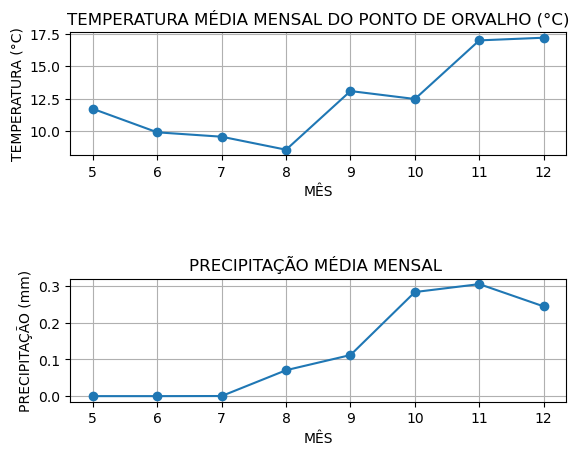

In [4]:
%run -m climaplot ;